In [130]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [131]:
df=pd.read_csv("train.csv")

In [132]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


In [133]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [135]:
df.corr()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,1.000000,1.235872e-03,5.291503e-05,0.003338,1.170712e-02,-5.356989e-03,-0.004792,0.004826,-0.001900,3.956573e-03,...,-0.004730,0.001859,0.008670,-0.002201,2.941249e-03,-0.005402,-0.005604,-0.009127,-4.044109e-03,0.000859
Customer_ID,0.001236,1.000000e+00,-6.660113e-17,-0.002172,5.769305e-03,1.076923e-02,0.010196,-0.001189,-0.004601,-4.712091e-03,...,0.004581,0.005163,0.000660,0.000352,4.381594e-03,-0.002174,-0.014822,0.023904,1.632440e-02,-0.000922
Month,0.000053,-6.660113e-17,1.000000e+00,0.016990,-1.557496e-16,1.530483e-17,-0.001819,0.000079,0.000090,6.790115e-18,...,0.000342,0.000115,-0.000671,0.139604,3.200578e-17,0.002440,0.022784,0.049716,-1.043065e-16,-0.002095
Age,0.003338,-2.172258e-03,1.698955e-02,1.000000,-8.410995e-03,9.152456e-02,0.090636,-0.190415,-0.148567,-2.175571e-01,...,-0.174119,-0.184264,-0.157254,-0.250960,-2.023741e-01,0.025492,0.234618,-0.047334,7.104515e-02,0.116098
SSN,0.011707,5.769305e-03,-1.557496e-16,-0.008411,1.000000e+00,-8.041949e-03,-0.008367,0.011651,-0.004961,4.774004e-03,...,0.010697,0.013787,0.019752,-0.006684,2.950511e-03,0.002653,-0.003572,-0.004696,-2.951901e-03,-0.002724
Annual_Income,-0.005357,1.076923e-02,1.530483e-17,0.091525,-8.041949e-03,1.000000e+00,0.998154,-0.284060,-0.217852,-3.023524e-01,...,-0.250105,-0.286297,-0.176353,-0.280242,-2.693193e-01,0.175930,0.272374,0.438106,8.062806e-01,0.625640
Monthly_Inhand_Salary,-0.004792,1.019558e-02,-1.818625e-03,0.090636,-8.367089e-03,9.981538e-01,1.000000,-0.283181,-0.216847,-3.018580e-01,...,-0.249438,-0.285360,-0.176187,-0.279736,-2.690445e-01,0.176092,0.271457,0.421836,8.073264e-01,0.626631
Num_Bank_Accounts,0.004826,-1.188701e-03,7.909795e-05,-0.190415,1.165117e-02,-2.840602e-01,-0.283181,1.000000,0.442694,5.843015e-01,...,0.560193,0.601842,0.333794,0.518323,5.070634e-01,-0.071783,-0.485331,0.050035,-2.278278e-01,-0.286709
Num_Credit_Card,-0.001900,-4.600690e-03,8.973261e-05,-0.148567,-4.960946e-03,-2.178520e-01,-0.216847,0.442694,1.000000,4.979115e-01,...,0.479762,0.423300,0.255495,0.459429,4.903760e-01,-0.055249,-0.417205,0.058853,-1.746004e-01,-0.231913
Interest_Rate,0.003957,-4.712091e-03,6.790115e-18,-0.217557,4.774004e-03,-3.023524e-01,-0.301858,0.584302,0.497912,1.000000e+00,...,0.589185,0.571457,0.370156,0.632562,6.294144e-01,-0.075700,-0.576230,0.071651,-2.424790e-01,-0.317919


<AxesSubplot:>

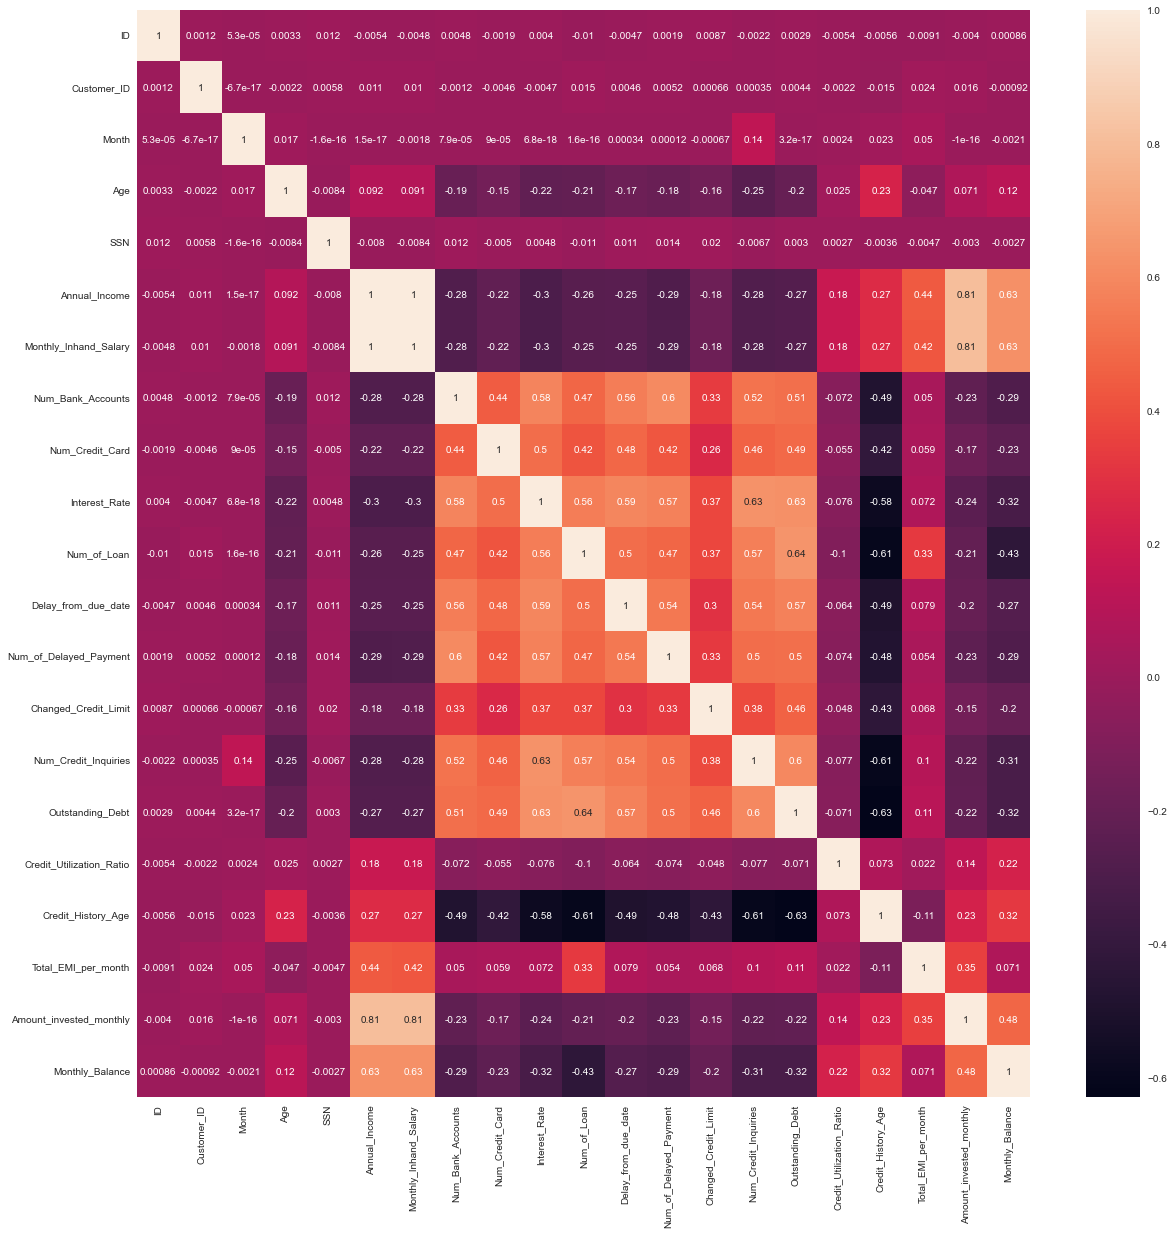

In [136]:
plt.figure(figsize=(20,20)) # grafiği buyutmek için ölçeklendirme için
sns.heatmap(df.corr(),annot=True)

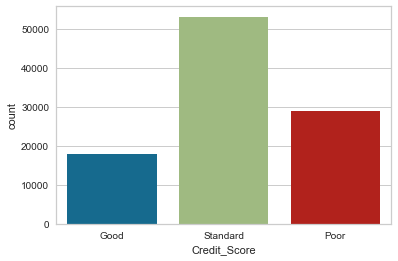

In [137]:
sns.countplot(x=df["Credit_Score"]);

In [138]:
df["Credit_Mix"].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [139]:
d={"Standard":1,"Bad":0,"Good":2}

In [140]:
df["Credit_Mix"]=df["Credit_Mix"].map(d)

In [141]:
df["Credit_Mix"].value_counts()

1    45848
2    30384
0    23768
Name: Credit_Mix, dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [143]:
df["Occupation"].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [144]:
df["Type_of_Loan"].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [145]:
df["Credit_Mix"].value_counts()

1    45848
2    30384
0    23768
Name: Credit_Mix, dtype: int64

In [146]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [147]:
x=df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]]

In [148]:
y=df["Credit_Score"]

In [149]:
from sklearn.model_selection import train_test_split



In [150]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.33, random_state=42)

In [151]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [166]:
tahmin=model.predict(xtest)

In [167]:
accuracy_score(tahmin,ytest)

0.8076363636363636

In [152]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [158]:
k=KNeighborsClassifier()

In [159]:
k.fit(x,y)

KNeighborsClassifier()

In [160]:
tahmin3=k.predict(x)

In [161]:
accuracy_score(tahmin3,y)

0.85085

In [155]:
def classification(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    
    algos=[g,b,KN,SVC,D,R,Log]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [156]:
classification(x,y)

,accuracy_score
RandomForestClassifier,0.81210
KNeighborsClassifier,0.77070
DecisionTreeClassifier,0.76160
GaussianNB,0.60885
BernoulliNB,0.59040
LogisticRegression,0.54140
SVC,0.53320


In [162]:
gb=GradientBoostingClassifier()

In [163]:
gb.fit(x,y)

GradientBoostingClassifier()

In [164]:
tahmin7=gb.predict(x)

In [165]:
accuracy_score(tahmin7,y)

0.71349